----------------------------------------------------------------------

# ResNext WSL

*Author: Facebook AI*

**ResNext models trained with billion scale weakly-supervised data.**

<img src="https://pytorch.org/assets/images/wsl-image.png" alt="alt" width="50%"/>

图1：使用不同规模和参数配置的ResNeXt-101模型在ImageNet和Instagram标记数据集的分类性能的比较

何恺明团队新作ResNext：Instagram图片预训练，挑战ImageNet新精度


8亿参数，刷新ImageNet纪录：何恺明团队开源最强ResNeXt预训练模型

resnext101_32x{4,8,16,32,48}d_wsl，其中wsl是弱监督学习。用Instagram上面的9.4亿张图做了 (弱监督) 预训练，用ImageNet做了微调。

ImageNet测试中，它的 (32×48d) 分类准确率达到85.4% (Top-1) ，打破了从前的纪录。

# 导入库

In [3]:
# 导入库
import torch 
import torch.nn as nn
from torchvision import transforms


# 导入我们自定义的model
import models

# 加载模型

In [7]:
model_ft = models.resnext101_32x16d_wsl()
r = model_ft.eval() # 预测问题，指定eval

那么，我们来看下我们模型参数

In [9]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

# 加载图片数据

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x188A75080>
(500, 375)


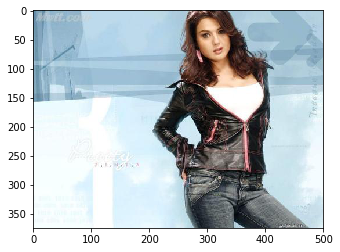

In [17]:
file_name = 'images/yindu.jpg'
from PIL import Image
input_image = Image.open(file_name)
print(input_image)
print(input_image.size)

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(input_image)

# 图片数据预处理

In [22]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(file_name)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
print('input_tensor.shape = ',input_tensor.shape)
print('input_tensor = ',input_tensor)

input_tensor.shape =  torch.Size([3, 224, 224])
input_tensor =  tensor([[[ 0.8104,  0.9646,  1.0502,  ...,  0.3994,  0.4166,  0.4337],
         [ 0.7591,  0.9646,  1.0502,  ...,  0.4337,  0.4337,  0.4508],
         [ 0.7248,  0.9474,  1.0673,  ...,  0.4166,  0.4337,  0.4337],
         ...,
         [ 2.1119,  2.1290,  2.1290,  ..., -0.2513, -0.2513, -0.3198],
         [ 2.0948,  2.1119,  2.0948,  ..., -0.2513, -0.1828, -0.2171],
         [ 2.0777,  2.0948,  2.0948,  ..., -0.3198, -0.1486, -0.1828]],

        [[ 1.5357,  1.6933,  1.7808,  ...,  1.0980,  1.1155,  1.1331],
         [ 1.5007,  1.6758,  1.7808,  ...,  1.1506,  1.1506,  1.1681],
         [ 1.4307,  1.6583,  1.7633,  ...,  1.1681,  1.1856,  1.1856],
         ...,
         [ 2.4111,  2.4111,  2.4286,  ...,  0.0126,  0.0126, -0.0574],
         [ 2.4286,  2.4286,  2.4286,  ...,  0.0126,  0.0826,  0.0476],
         [ 2.4286,  2.4286,  2.4286,  ..., -0.0574,  0.1176,  0.0826]],

        [[ 2.1171,  2.2566,  2.3437,  ...,  1.7163, 

convert data format input_batch =   torch.Size([1, 3, 224, 224])


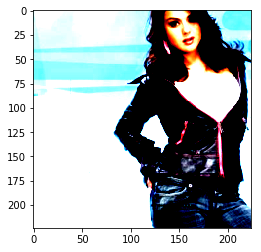

In [28]:
#  转化格式
# torch.Size([3, 224, 224])->torch.Size([1, 3, 224, 224])
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('convert data format input_batch =  ',input_batch.shape)

# 数据预处理后，展示
import matplotlib.pyplot as plt
%matplotlib inline
image_tmp = input_tensor.permute(1,2,0)
image_tmp=torch.clamp(image_tmp,0,1)
plt.imshow(image_tmp)

# 模型在线预测

In [31]:
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model_ft.to('cuda')

with torch.no_grad():
    output = model_ft(input_batch)

In [33]:
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0].shape)

torch.Size([1000])


In [34]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
print(torch.nn.functional.softmax(output[0], dim=0))

tensor([3.5270e-07, 2.3827e-07, 1.3861e-06, 5.3009e-07, 2.5409e-07, 1.8251e-06,
        1.7445e-07, 1.0143e-06, 3.0161e-07, 1.0660e-06, 9.1037e-08, 2.0734e-06,
        5.2966e-07, 5.2686e-08, 1.5117e-06, 1.2184e-07, 2.6446e-07, 5.5008e-07,
        6.2036e-07, 2.1994e-07, 4.9589e-07, 8.2086e-07, 1.3946e-06, 4.5756e-07,
        9.9909e-07, 2.8331e-07, 4.7119e-07, 5.3000e-08, 6.0915e-08, 4.0180e-07,
        2.4331e-07, 2.7589e-07, 6.3116e-07, 6.1382e-08, 5.3174e-07, 1.7245e-07,
        9.4532e-07, 3.0079e-07, 3.3994e-07, 1.2531e-07, 1.3009e-07, 2.1120e-07,
        2.6663e-07, 7.8510e-07, 4.3790e-07, 8.0087e-07, 7.1405e-07, 1.5058e-07,
        1.1376e-06, 9.1029e-07, 2.7141e-07, 1.1278e-06, 4.3894e-07, 9.8616e-07,
        2.8148e-07, 2.3489e-07, 4.9821e-06, 1.3153e-07, 7.0292e-07, 2.5403e-07,
        1.4723e-06, 5.0962e-07, 2.7844e-07, 6.6397e-07, 3.6231e-07, 1.1549e-07,
        9.0241e-08, 4.8074e-07, 3.6244e-08, 1.7175e-06, 7.9838e-06, 3.9942e-07,
        1.3572e-06, 1.0850e-06, 1.1468e-

# 获取最大可能性的类别

需要获取的数据： id－name 的标签  ，获取结果中最大可能性id号 

In [40]:
result = torch.nn.functional.softmax(output[0], dim=0)

# result -> list
v_list = result.cpu().numpy().tolist()

v_max = 0
idx = 0
for i,v in enumerate(v_list):
    
    if v>v_max:
        v_max = v
        idx = i
print('v_max = ',v_max) # 1000 个分类中，idx 对应的可能性
print('idx = ',idx)

v_max =  0.38611888885498047
idx =  638


In [41]:
# maillot 紧身衣；女子游泳衣；紧身体操衣

In [49]:
import codecs
ImageNet_dict = {}

for line in  codecs.open('data/ImageNet1k_label.txt','r'):
    line = line.strip() # 0: 'tench, Tinca tinca',                             丁鲷(鱼)
    
    _id = line.split(":")[0]
    _name = line.split(":")[1]
    _name = _name.replace('\xa0',"")
    ImageNet_dict[int(_id)] = _name

In [50]:
ImageNet_dict

{0: " 'tench, Tinca tinca',              丁鲷(鱼)",
 1: " 'goldfish, Carassius auratus',        金鱼，鲫鱼",
 2: " 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 大白鲨",
 3: " 'tiger shark, Galeocerdo cuvieri',           虎鲨",
 4: " 'hammerhead, hammerhead shark',    锤头鲨",
 5: " 'electric ray, crampfish, numbfish, torpedo',         电鳐",
 6: " 'stingray',     黄貂鱼",
 7: " 'cock',      公鸡",
 8: " 'hen',      母鸡",
 9: " 'ostrich, Struthio camelus',     鸵鸟",
 10: " 'brambling, Fringilla montifringilla',   荆棘",
 11: " 'goldfinch, Carduelis carduelis',   金翅雀",
 12: " 'house finch, linnet, Carpodacus mexicanus',     红雀",
 13: " 'junco, snowbird',  灯芯草雀",
 14: " 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',  蓝鹀",
 15: " 'robin, American robin, Turdus migratorius',     知更鸟",
 16: " 'bulbul',     夜莺",
 17: " 'jay',      松鸦 (ps",
 18: " 'magpie',     喜鹊",
 19: " 'chickadee',   山雀",
 20: " 'water ouzel, dipper',    河鸟",
 21: " 'kite',      风筝",
 22: " '

In [51]:
ImageNet_dict[idx]

" 'maillot',"